### **Analytics For Unstructured Data Assignmnet 1**



- Team Members: Anubhav Nehru, Antra Sinha, Avi Walyat, Abhijit Anil, Gaytri Vasal





**Before performing any tasks, we have scraped 5000 comments from Edmunds.com starting from page 1.**

url - https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1

In [ ]:
#importing the libraries needed
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

#Declaring the headers
headers = {"Accept-Language": "en-US,en;q=0.5"}

#declaring the list of empty variables, So that we can append the data overall

user_id = []
date = []
comment = []

#creating an array of values and passing it in the url for dynamic webpages (1 to 10 with a step of 1)
pages = np.arange(1,125,1)


#Beautiful soup is a python package which has html parsing module to extract html documents
#the whole core of the script
for page in pages:
    page = requests.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p"+str(page))
    soup = BeautifulSoup(page.text, 'html.parser')
    comment_data = soup.findAll('div', attrs = {'class': 'Comment'})

    #Will send request in randon 2-8 sec to the imbd website
    sleep(randint(2,8))
    for store in comment_data:

        # Find the 'div' element with class 'AuthorWrap'
        author_div = store.find('div', class_='AuthorWrap')
        # Extract the 'userid' from the 'a' tag inside 'AuthorWrap'
        user = author_div.find('a', class_='Username').text.strip()
        user_id.append(user)

        # Find the 'span' element with class 'MItem DateCreated'
        date_span = store.find('span', class_='MItem DateCreated')
        # Extract the 'time' attribute from the 'time' tag inside 'DateCreated'
        specifc_date = date_span.find('time')['title']
        date.append(specifc_date)

        specfic_comment = store.find('div', class_ = "Message userContent").text.replace('\n', '')
        comment.append(specfic_comment)

#creating a dataframe
comment_list = pd.DataFrame({ "User Name": user_id, "Time" : date, "Comment": comment})

<h3> <b>Task A: </b> </h3>
<br>Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [96]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv
import re

import collections


comment_list = pd.read_csv('edmunds_entry_scraped.csv').drop(columns = 'Unnamed: 0', axis=1)

car_replace_df = pd.read_csv('car_models_and_brands.csv')

additional_model_to_brand = {
    'G35': 'Infiniti',
    'tl': 'Acura',
    '330i': 'BMW',
    '325i': 'BMW',
    'rx': 'Lexus',
    'ls': 'Lexus',
    'gs': 'Lexus',
    'es': 'Lexus'
}

values_to_drop = ['seat','car','sedan' ,'problem','saturn','hyndaikia']

# Convert the mappings into a list of dictionaries
new_rows = [{'Model': model, 'Brand': brand} for model, brand in additional_model_to_brand.items()]

car_replace_df = car_replace_df.append(new_rows, ignore_index=True)
car_replace_df = car_replace_df[~car_replace_df['Brand'].isin(values_to_drop)]

car_model_to_make = dict(zip(car_replace_df['Model'].str.lower(), car_replace_df['Brand'].str.lower()))



# Define the modified dictionary
key_new = {"volkwagen": "volkswagen", "mercedes-benz": "mercedes"}

# Modify the car_model_to_make dictionary using key_b
for old_model, new_brand in key_new.items():
    if old_model in car_model_to_make:
        car_model_to_make[old_model] = new_brand

C:\Users\awaly\AppData\Local\Temp\ipykernel_21148\3917547818.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_replace_df = car_replace_df.append(new_rows, ignore_index=True)


In [97]:
comment_list = comment_list.head(5200)

                            OLS Regression Results                            
Dep. Variable:           LogFrequency   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 7.229e+05
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:12:16   Log-Likelihood:                -2581.0
No. Observations:               43741   AIC:                             5166.
Df Residuals:                   43739   BIC:                             5183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7247      0.012    896.705      0.0

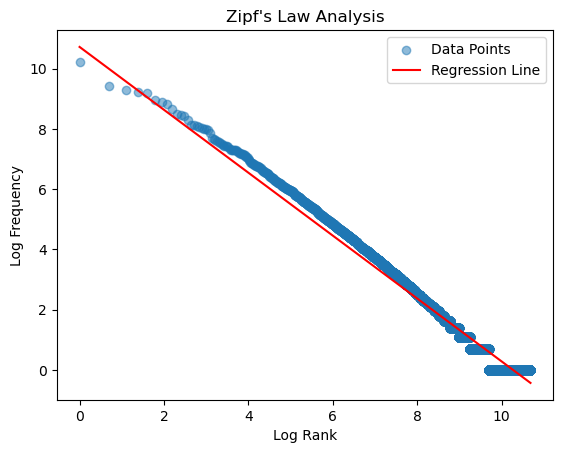

Zipf's Law Exponent (slope): -1.044267762058088
The data follows Zipf's law.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have a DataFrame 'comment_list' with a column "Comment" containing the text data
data = comment_list['Comment']

# Initialize an empty list to store all words
all_words = []

# Tokenize each comment into words and append them to the 'all_words' list
for comment in data:
    if pd.notna(comment):
        words = comment.lower().split()
        all_words.extend(words)

# Calculate word frequencies
word_freq = pd.Series(all_words).value_counts()

# Calculate the ranks and log frequencies
ranks = np.arange(1, len(word_freq) + 1)
log_ranks = np.log(ranks)
log_freq = np.log(word_freq.values)

# Create a DataFrame for regression
data = pd.DataFrame({'LogRank': log_ranks, 'LogFrequency': log_freq})

# Add a constant term for the intercept
data = sm.add_constant(data)

# Fit the OLS regression model
model = sm.OLS(data['LogFrequency'], data[['const', 'LogRank']])
results = model.fit()

# Get the regression coefficients
const, slope = results.params['const'], results.params['LogRank']

# Print the regression summary
print(results.summary())

# Plot the data and regression line
plt.scatter(log_ranks, log_freq, alpha=0.5, label='Data Points')
plt.plot(log_ranks, const + slope * log_ranks, color='red', label='Regression Line')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.legend()
plt.title('Zipf\'s Law Analysis')
plt.show()

# Interpret the results
print(f"Zipf's Law Exponent (slope): {slope}")

# Determine whether the data follows Zipf's law based on the slope
if abs(slope + 1) < 0.1:  # You can adjust the threshold for your specific dataset
    print("The data follows Zipf's law.")
else:
    print("The data does not follow Zipf's law.")


<h2> Insights

- Based on our regression analysis, it's clear that our linear model has a coefficient above -1 (specifically, -1.04). This matches Zipf's law and suggests our data follows this law closely.

- The -1.04 coefficient shows our model fits the data well and explains a good part of the data's patterns, just like Zipf's law predicts.

- Additionally, the p-value of 0 strongly supports Zipf's law in our dataset. In simple terms, our analysis confirms that Zipf's law is a good fit for our data.

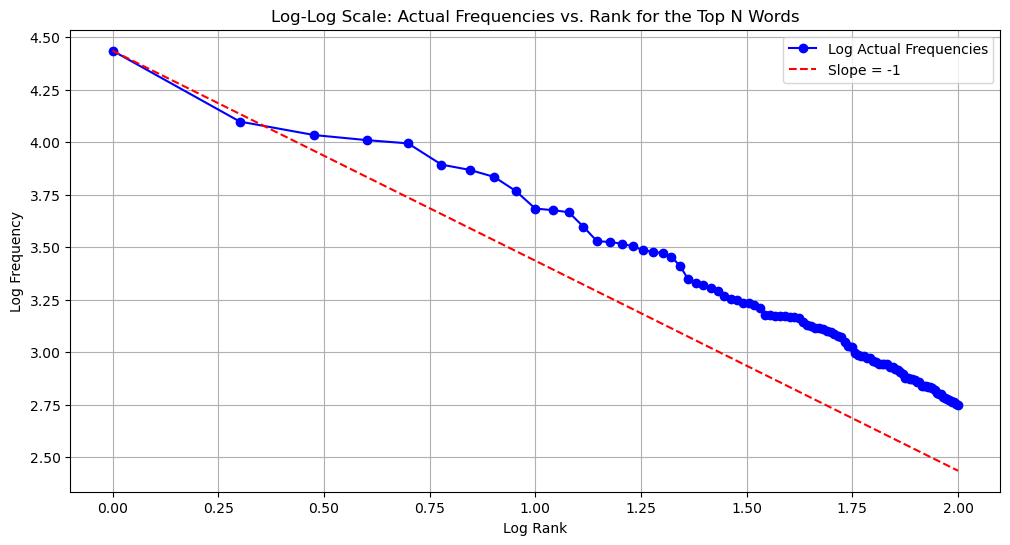

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import zipf

# Assuming you have a DataFrame 'comment_list' with a column "Comment" containing the text data
data = comment_list['Comment']

# Initialize an empty list to store all words
all_words = []

# Tokenize each comment into words and append them to the 'all_words' list
for comment in data:
    if pd.notna(comment):
        words = comment.lower().split()
        all_words.extend(words)

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the top N most common words (adjust N as needed)
N = 100
top_N_words = word_freq.most_common(N)

# Extract the frequencies and ranks
frequencies = [count for _, count in top_N_words]
ranks = list(range(1, N + 1))

# Apply logarithm transformation to the actual frequencies and ranks
log_frequencies = np.log10(frequencies)
log_ranks = np.log10(ranks)

# Plot the log-log scale graph
plt.figure(figsize=(12, 6))
plt.plot(log_ranks, log_frequencies, marker='o', linestyle='-', color='b', label='Log Actual Frequencies')

# Add a reference line with a slope of -1
slope_minus_1 = [-1 * log_rank + log_frequencies[0] for log_rank in log_ranks]
plt.plot(log_ranks, slope_minus_1, linestyle='--', color='r', label='Slope = -1')

plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Log-Log Scale: Actual Frequencies vs. Rank for the Top N Words')
plt.legend()
plt.grid(True)
plt.show()


In [126]:
# Create a DataFrame with two columns
top_100_df = pd.DataFrame(top_N_words, columns=['Word', 'Freq'])
top_100_df.head(20)

,Word,Freq
0,the,27238
1,a,12527
2,and,10804
3,to,10217
4,i,9863
5,is,7812
6,of,7373
7,in,6824
8,that,5841
9,it,4825


In [127]:
top_100_words = top_100_df['Word']

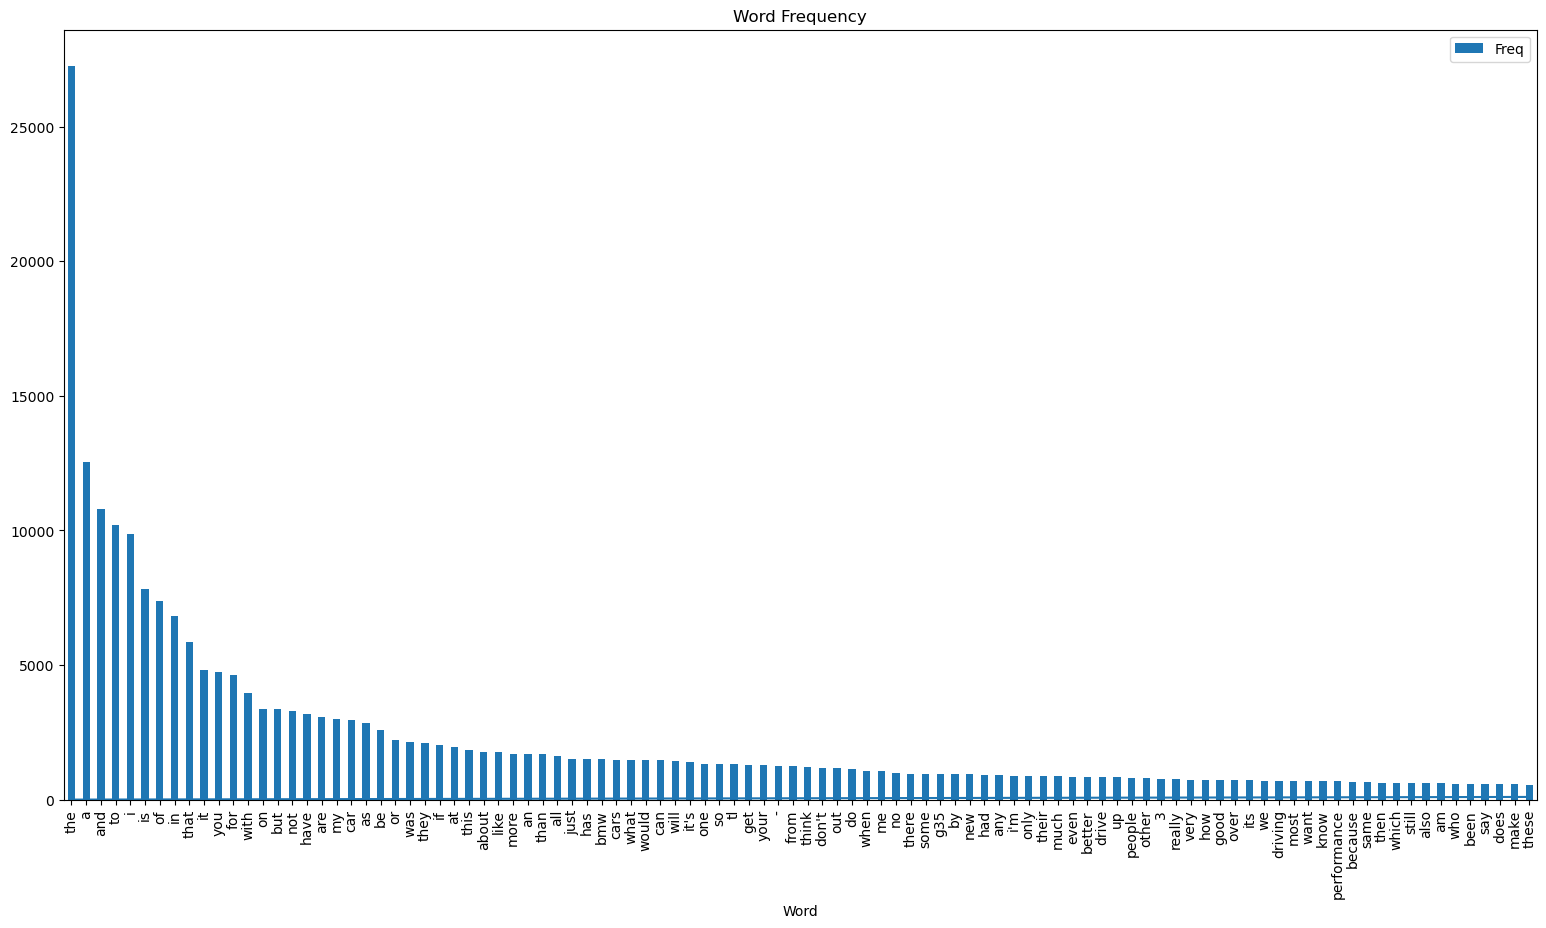

In [132]:
plt=top_100_df.sort_values('Freq', ascending=False).plot.bar(x='Word', y='Freq', title='Word Frequency',figsize=(19,10))
plt.plot(range(len(top_100_words)))

<h2> Insights 

- After looking at the tables above, it's clear that the word "the" is the most common word in our review dataset, appearing almost 28,000 times. This result aligns with what we expected, as "the" is often the most common word in many datasets. "a" & "and" are also very frequent words, coming right after "the" in terms of frequency.

<h3>Task B: </h3>

Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file. Even if a brand (e.g., BMW) is mentioned multiple times in a message, it should be counted as 1.   

In [101]:
from collections import Counter
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords and punkt if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {"nt"}  # Replace with your own words
stop_words.update(custom_stopwords)

# Initialize a Counter to store brand frequencies with unique mentions
brand_frequencies = Counter()

# Initialize a Counter to store word frequencies for all words (including brands with unique mentions)
word_frequencies = Counter()

# Create a set of unique car brands from the mapping data
unique_car_brands = set(car_replace_df['Brand'].str.lower())

brands_to_remove = ["car", "seat", 'sedan', 'problem']  # Add any other brand names to remove here
unique_car_brands.difference_update([brand.lower() for brand in brands_to_remove])

# Define a function to remove punctuation from a word
def remove_punctuation(word):
    return re.sub(r'[^a-zA-Z0-9]', '', word)

# Initialize a list to store cleaned comments
cleaned_comments = []

# Tokenize and preprocess comments
for comment in comment_list['Comment']:
    if pd.notna(comment):  # Check for missing values
        # Tokenize the comment into words and remove punctuation
        words = [remove_punctuation(word) for word in word_tokenize(comment.lower())]

        # Remove empty strings after punctuation removal
        words = [word for word in words if word]

        # Initialize a set to store unique brand mentions in the comment
        unique_brand_mentions_in_comment = set()

        # Replace car models with makes and remove stopwords
        only_normal_words = []
        for word in words:
            if word not in stop_words:
                brand = car_model_to_make.get(word, word)
                if brand in unique_car_brands:
                    unique_brand_mentions_in_comment.add(brand)
                else:
                    only_normal_words.append(word)

        # Update brand frequencies only for unique brands mentioned in the mapping data
        brand_frequencies.update(unique_brand_mentions_in_comment)

        # Join the cleaned words back into a comment and store it
        cleaned_comment = ' '.join(only_normal_words)
        cleaned_comments.append(cleaned_comment)

        # Ensure that all words, including brands, are unique in word frequencies
        final_words = list(set(only_normal_words + list(unique_brand_mentions_in_comment)))

        # Update word frequencies for all words (including brands with unique mentions)
        word_frequencies.update(final_words)

# Find the top 10 mentioned brands by frequency counts (with unique brand mentions)
top_mentioned_brands = brand_frequencies.most_common(10)

print('\n', 'Top 10 mentioned brands and their frequencies (with unique brand mentions)')

# Print the top 10 mentioned brands and their frequencies (with unique brand mentions)
for brand, count in top_mentioned_brands:
    print(f'{brand}: {count}')

print('\n')

# Store word frequencies for all words (including brands) in a different list (with unique brand mentions)
all_word_frequencies = word_frequencies.most_common()

print('\n', 'Top 10 words and their frequencies (including brands with unique mentions)')

# Print the top 10 words (including brands) and their frequencies (with unique mentions)
for word, count in all_word_frequencies[:10]:
    print(f'{word}: {count}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awaly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\awaly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 Top 10 mentioned brands and their frequencies (with unique brand mentions)
bmw: 1649
acura: 1270
infiniti: 1041
audi: 455
lexus: 438
honda: 431
toyota: 316
nissan: 305
subaru: 211
volkswagen: 148



 Top 10 words and their frequencies (including brands with unique mentions)
car: 2068
bmw: 1649
like: 1298
acura: 1270
cars: 1264
would: 1170
one: 1148
infiniti: 1041
get: 1020
think: 976


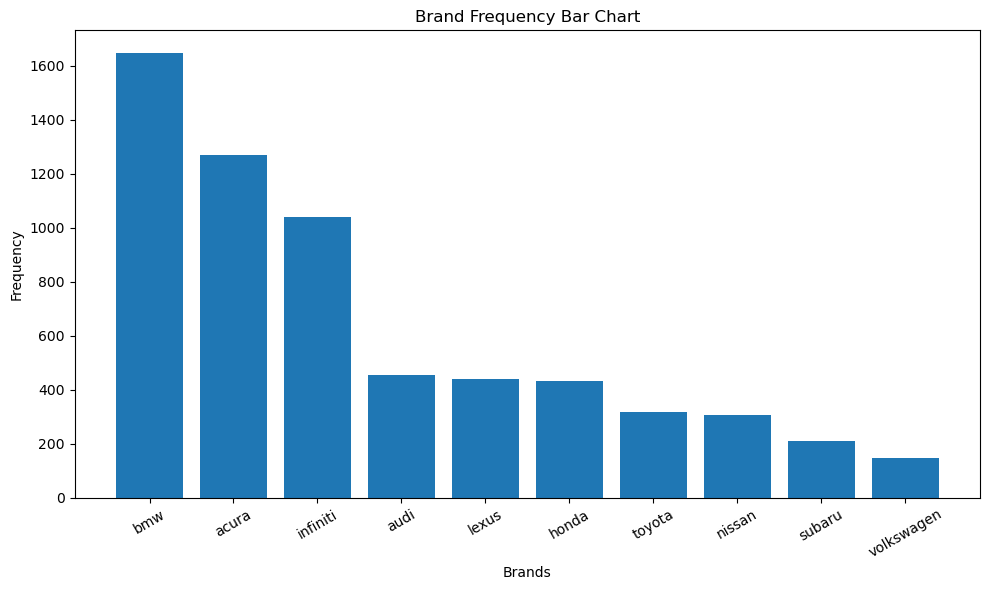

In [102]:
# Create a DataFrame with two columns
top_10_df = pd.DataFrame(top_mentioned_brands, columns=['Brand Name', 'Freq'])


plt.figure(figsize=(10, 6))

plt.bar(top_10_df['Brand Name'], top_10_df['Freq'])

plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title('Brand Frequency Bar Chart')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

<h2> Insights 

After our analysis, it's clear that BMW is the brand that comes up the most in our dataset, showing up in over 1,650 reviews from Edmunds. Acura and Infiniti are also mentioned frequently, but BMW takes the top spot among the 10 top cars.

Please note that our dataset only includes data from 2000 to 2006. So, we can't make direct comparisons with more recent trends because of this time period induced data limit.

<h3>Task C: </h3>

Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. In your code, ensure that a message is not counted in the lift calculations if the mentions of two brands are separated by more than, say, 5 or 7 words. 

In [103]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove punctuation from a word
def remove_punctuation(word):
    return re.sub(r'[^a-zA-Z0-9]', '', word)

# Initialize a list to store final comments (with models replaced by brands)
final_comments = []

# Tokenize and preprocess comments
for comment in comment_list['Comment']:
    if pd.notna(comment):  # Check for missing values
        # Tokenize the comment into words and remove punctuation
        words = [remove_punctuation(word) for word in word_tokenize(comment.lower())]

        # Remove stopwords and empty strings after punctuation removal
        words = [word for word in words if word not in stop_words and word]

        # Replace car models with brands
        words = [car_model_to_make.get(word, word) for word in words]

        # Join the cleaned words back into a comment and store it
        final_comment = ' '.join(words)
        final_comments.append(final_comment)

In [104]:
# Initialize a list to store cleaned comments
cleaned_comments = final_comments.copy()

In [105]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from itertools import combinations
from collections import defaultdict


# Function to calculate lift ratio
def calculate_lift(brand1, brand2, brand_counts1, word_distance_threshold):
    # Count the number of messages containing each brand
    # brand1_count = sum(1 for comment in cleaned_comments_df['Comment'] if brand1 in comment)
    # brand2_count = sum(1 for comment in cleaned_comments_df['Comment'] if brand2 in comment)

    brand1_count = brand_counts1[brand_counts1['Brand'] == brand1].iloc[0,1]
    brand2_count = brand_counts1[brand_counts1["Brand"] == brand2].iloc[0,1]
    # brand1_count = brand_counts1[brand1]
    # brand2_count = brand_counts1[brand2]

    # Count the number of messages containing both brands within a specified word distance
    word_distance_threshold = 7
    co_occurrence_count = 0

    for comment in cleaned_comments:
        tokens = nltk.word_tokenize(comment.lower())
        brand1_indices = [i for i, word in enumerate(tokens) if word == brand1]
        brand2_indices = [i for i, word in enumerate(tokens) if word == brand2]

        found = False
        for i in brand1_indices:
            for j in brand2_indices:
                found = False
                if abs(i - j) <= word_distance_threshold:
                    co_occurrence_count += 1
                    found = True
                    break  # Break to count only once per message
            if found == True:
                break  # Break to count only once per message

    # Calculate lift ratio
    if co_occurrence_count == 0:
        return 0
    else:
        return (len(cleaned_comments) * co_occurrence_count) / (brand1_count * brand2_count)


# Extract the DataFrame from the list of tuples
brand_counts_df = pd.DataFrame(top_mentioned_brands, columns=['Brand', 'Count'])

# Calculate lift ratios for all pairs of top-10 brands
lift_ratios = defaultdict(dict)

for brand1, brand2 in combinations(brand_counts_df['Brand'], 2):
    lift = calculate_lift(brand1, brand2, brand_counts_df, 7)
    lift_ratios[brand1][brand2] = lift
    lift_ratios[brand2][brand1] = lift

In [106]:
lift_ratio_df = pd.DataFrame(lift_ratios)

In [107]:
# Extract the last row
last_row1 = lift_ratio_df.iloc[-1]

# Remove the last row from the DataFrame
lift_ratio_df = lift_ratio_df.iloc[:-1]

# Insert the last row as the first row and reset the index
lift_ratio_df = pd.concat([last_row1.to_frame().T, lift_ratio_df], ignore_index=True)


In [108]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame lift_ratio_df containing the lift ratios

# Create a copy of the DataFrame
upper_right_diagonal_df = lift_ratio_df.copy()

# Set lower-left diagonal values to NaN
for i in range(len(upper_right_diagonal_df)):
    for j in range(i + 1, len(upper_right_diagonal_df)):  # Adjust the loop range
        upper_right_diagonal_df.iloc[i, j] = np.nan

# Add headers for rows and columns
upper_right_diagonal_df.columns = lift_ratio_df.columns
upper_right_diagonal_df.index = lift_ratio_df.columns

# Remove NaN values
upper_right_diagonal_df = upper_right_diagonal_df.dropna(axis=1, how='all')

# Format numbers to two decimal places
formatted_df = upper_right_diagonal_df.applymap(lambda x: f'{x:.2f}' if not pd.isna(x) else '')

# Get the maximum width for each column
column_widths = formatted_df.applymap(lambda x: len(str(x))).max()

# Align and print the DataFrame with proper spacing
for column in formatted_df.columns:
    formatted_df[column] = formatted_df[column].apply(lambda x: f'{x:>{column_widths[column]}}')

formatted_df


,bmw,acura,infiniti,audi,lexus,honda,toyota,nissan,subaru
bmw,,,,,,,,,
acura,0.75,,,,,,,,
infiniti,1.03,1.40,,,,,,,
audi,1.02,0.72,0.84,,,,,,
lexus,0.86,1.14,1.14,1.07,,,,,
honda,0.40,1.15,0.49,0.34,0.38,,,,
toyota,0.39,0.39,0.25,0.40,1.42,3.35,,,
nissan,0.31,0.75,1.00,0.34,0.54,2.57,2.75,,
subaru,0.48,0.54,0.61,0.76,0.56,0.68,0.54,0.65,
volkswagen,0.45,0.28,0.27,2.62,0.40,0.73,1.00,0.57,0.50


In [109]:
# Importing the necessary module for Multidimensional Scaling (MDS)
from sklearn.manifold import MDS

# Define a function to invert values, replacing zeros with NaN
def invert_and_replace_zero(x):
    if x == 0:
        return np.NaN
    return 1/x

# Applying the invert_and_replace_zero function to a DataFrame called lift_ratio_df
inverted_lift_df = lift_ratio_df.applymap(invert_and_replace_zero)

# Replacing NaN values in the inverted DataFrame with 200
inverted_lift_df = inverted_lift_df.replace(to_replace=np.NaN, value=200)

# Scaling the values in the DataFrame by taking the power of 0.2
# This is done to improve distances for Multidimensional Scaling (MDS)
scaled_lift_df = inverted_lift_df ** 0.2

# Printing the resulting DataFrame with scaled values
scaled_lift_df


,bmw,acura,infiniti,audi,lexus,honda,toyota,nissan,subaru,volkswagen
0,2.885400,1.059009,0.993955,0.995353,1.030116,1.200191,1.208236,1.264338,1.159455,1.174995
1,1.059009,2.885400,0.934761,1.068386,0.974466,0.972932,1.208529,1.059172,1.130235,1.293589
2,0.993955,0.934761,2.885400,1.034612,0.974469,1.155364,1.317003,1.000616,1.102390,1.299893
3,0.995353,1.068386,1.034612,2.885400,0.987015,1.237919,1.202941,1.243360,1.057344,0.824788
4,1.030116,0.974466,0.974469,0.987015,2.885400,1.210453,0.931663,1.129568,1.122366,1.200982
5,1.200191,0.972932,1.155364,1.237919,1.210453,2.885400,0.785090,0.828240,1.078696,1.064345
6,1.208236,1.208529,1.317003,1.202941,0.931663,0.785090,2.885400,0.817084,1.129165,1.000287
7,1.264338,1.059172,1.000616,1.243360,1.129568,0.828240,0.817084,2.885400,1.091646,1.117124
8,1.159455,1.130235,1.102390,1.057344,1.122366,1.078696,1.129165,1.091646,2.885400,1.149391
9,1.174995,1.293589,1.299893,0.824788,1.200982,1.064345,1.000287,1.117124,1.149391,2.885400


<h3> Task D: </h3>

Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub). 



c:\Users\awaly\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


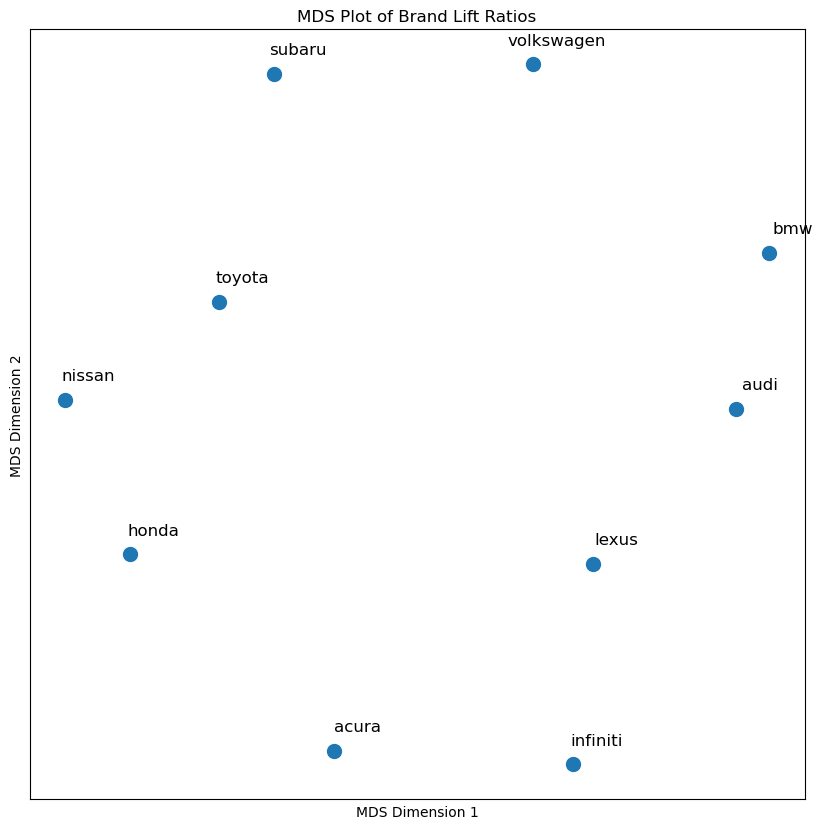

In [110]:
# Import necessary libraries
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS to reduce dimensions to 2D
lift_ratio_df2 = scaled_lift_df.fillna(1)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=25)
brand_positions = mds.fit_transform(lift_ratio_df2)

# Create the MDS plot
plt.figure(figsize=(10, 10))
plt.scatter(brand_positions[:, 0], brand_positions[:, 1], marker='o', s=100)

# Add labels for each brand (without values) with a slight offset
label_offset = 0.05  # Adjust this value to control the label offset

for (x, y), (brand, _) in zip(brand_positions, top_mentioned_brands):
    plt.text(x + label_offset, y + label_offset, brand, fontsize=12, ha='center', va='center')

# Set plot title and labels
plt.title("MDS Plot of Brand Lift Ratios")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")

# Remove x and y-axis scales
plt.xticks([])
plt.yticks([])

# Show the plot
plt.grid(True)
plt.show()


<h3> Task E: </h3>

What insights can you offer to your client from your analyses in Tasks C and D? 

- The close association between Nissan, Toyota, and Honda is evident from their lift values, all of which are above 2.57, and their close clustering on the MDS plot. Particularly noteworthy is the strong association between Honda and Toyota, as indicated by their impressive lift value of 3.35. Several factors contribute to this strong association. Firstly, all three brands originate from Japan and fall within the mid-priced segment, establishing a commonality among them. Furthermore, they have collectively invested in hybrid and electric vehicle technology, with Toyota pioneering hybrid tech through the Prius, and Honda and Nissan developing their electric and hybrid models. Additionally, their reputation for quality and durability has fostered strong brand loyalty. However, this also implies that these brands' names are often interchangeable, necessitating efforts to distinguish themselves when advertising, such as highlighting unique features or qualities that resonate with their target customers.

- BMW, Audi, Lexus, Infiniti, and Acura are closely located on the MDS plot, primarily due to their shared status as reputable high-end luxury car brands known for their interior quality, performance, and handling in their vehicles. All these brands target consumers who are willing to pay more for superior craftsmanship, advanced technology, and a premium driving experience.  Given their shared luxury segment, it becomes imperative for these brands to stand out by adhering to unique brand philosophies and highlighting distinct features or qualities that authentically represent the essence of their brand. For instance, Lexus endeavors to set itself apart through its uncompromising approach to luxury, focusing on interior comfort, craftsmanship, and attention to detail.

- Volkswagen and Subaru stand out as being less related to other brands, suggesting that their customers may exhibit stronger brand loyalty and be less inclined to consider alternatives. Subaru, with a lift value below one, is notably distinct from other brands, indicating that people do not frequently associate Subaru with other car manufacturers. This distinction stems from Subaru's deliberate efforts to cultivate a unique brand image associated with outdoor enthusiasts and active lifestyles, as well as its adoption of innovative technologies like the Symmetrical All-Wheel Drive system. Subaru's targeted marketing towards adventurous individuals further reinforces the idea of a loyal customer base that may find it challenging to switch to another brand. Similarly, Volkswagen's relative isolation from other car brands can be attributed to its diverse product lineup, ranging from compact cars to SUVs, luxury models, and electric vehicles. The brand's reputation for German engineering, emphasizing quality and durability, also contributes to its distinctiveness. This indicates a loyal customer base that may be hesitant to switch to another brand, given Volkswagen's broad range of offerings and reputation for precision and reliability.

- In order to retain and expand its customer base, Subaru should consider targeted marketing efforts that appeal to a broader audience while maintaining its outdoor and adventure-oriented image. Volkswagen, with its well-established reputation, can explore strategies to attract new customers, such as emphasizing its electric vehicle offerings and technological advancements in advertising campaigns

<h3> Task F: </h3>

What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS plot for this question. 

In [111]:
import pandas as pd

# Your list of top attributes
top_attributes = ["performance", "engine", "price", "handling", "interior"]

# Convert all_word_frequencies to a dictionary for easy lookup
word_freq_dict = dict(all_word_frequencies)

# Initialize a dictionary to store the frequencies of top attributes
attribute_frequencies = {}

# Extract frequencies of top attributes
for attribute in top_attributes:
    frequency = word_freq_dict.get(attribute, 0)
    attribute_frequencies[attribute] = frequency

# Create a DataFrame for the frequency table
frequency_df = pd.DataFrame(list(attribute_frequencies.items()), columns=['Attribute', 'Frequency'])

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Reset the DataFrame index for display
frequency_df.reset_index(drop=True, inplace=True)

# Print the formatted frequency table
print("Frequency Table of Top Attributes:")
print(frequency_df.to_string(index=False))


Frequency Table of Top Attributes:
  Attribute  Frequency
performance        672
     engine        445
      price        427
   handling        394
   interior        352


In [112]:
all_words = pd.DataFrame(all_word_frequencies)
all_words.columns = ['Word', 'Frequency']

In [113]:
# Create a DataFrame from brand_frequencies
all_brands = pd.DataFrame(brand_frequencies.items(), columns=['Brand', 'Frequency'])

In [114]:
def calculate_attribute_lift(brand, attribute, all_words):

    brand_count = all_words[all_words['Word'] == brand].iloc[0,1]
    att_count = all_words[all_words["Word"] == attribute].iloc[0,1]

    # Count the number of messages containing both brands within a specified word distance
    co_occurrence_count = 0

    for comment in cleaned_comments:
        tokens = nltk.word_tokenize(comment.lower())
        brand_indices = [i for i, word in enumerate(tokens) if word == brand]
        attribute_indices = [i for i, word in enumerate(tokens) if word == attribute]

        if len(attribute_indices) & len(brand_indices) > 0:
            co_occurrence_count += 1

    # Calculate lift ratio
    if co_occurrence_count == 0:
        return 0
    else:
        return (len(cleaned_comments) * co_occurrence_count) / (brand_count * att_count)

In [115]:
from collections import defaultdict
from itertools import product

brand_attribute_lifts = defaultdict(dict)

# Loop through all combinations of brand and attribute pairs
for brand, attribute in product(brand_counts_df['Brand'], top_attributes):
    lift = calculate_attribute_lift(brand, attribute, all_words)
    brand_attribute_lifts[brand][attribute] = lift
    brand_attribute_lifts[attribute][brand] = lift


In [116]:
# Create an empty DataFrame with the desired shape
df = pd.DataFrame(index=brand_counts_df['Brand'] , columns=top_attributes)

# Fill the DataFrame with some sample data (you can replace this with your actual data)
# Here, we're filling it with random values for demonstration purposes
import random

for brand in brand_counts_df['Brand']:
    for attribute in top_attributes:
        df.at[brand, attribute] = brand_attribute_lifts[attribute][brand]

# Display the DataFrame
df

,performance,engine,price,handling,interior
Brand,,,,,
bmw,0.903756,0.989991,1.016984,0.926456,0.679413
acura,0.826894,0.780439,0.832475,1.068122,1.067887
infiniti,0.904948,0.963322,1.13234,1.138621,1.416088
audi,0.933395,1.230137,1.281993,1.042026,1.263555
lexus,1.0754,1.011657,0.943323,0.932127,1.37991
honda,0.931624,0.946922,1.156012,1.038937,0.684059
toyota,0.952998,1.328431,0.96141,1.667095,0.839704
nissan,0.962051,1.070488,0.876554,0.518166,0.773323
subaru,1.024684,0.773694,1.036683,0.436921,1.537026


In [117]:
# Convert the DataFrame to a numeric type
df = df.apply(pd.to_numeric, errors='coerce')

# Define a function to get the top N attributes for each brand
def top_attributes_for_brands(df, n=3):
    top_attributes = {}

    # Iterate through each brand
    for brand in df.index:
        # Get the top N attributes for the current brand
        top_attrs = df.loc[brand].nlargest(n).index.tolist()
        top_attributes[brand] = top_attrs

    return top_attributes

# Call the function to get the top 3 attributes for each brand
top_3_attributes = top_attributes_for_brands(df, n=3)

print("Top 3 Attributes for each Brand")

# Print the results with brands in rows
for brand, attributes in top_3_attributes.items():
    print(f"{brand}: {', '.join(attributes)}")


Top 3 Attributes for each Brand
bmw: price, engine, handling
acura: handling, interior, price
infiniti: interior, handling, price
audi: price, interior, engine
lexus: interior, performance, engine
honda: price, handling, engine
toyota: handling, engine, price
nissan: engine, performance, price
subaru: interior, price, performance
volkswagen: price, engine, handling


<h3> Task G: </h3>

What advice will you give to your client from Task F? 

From our analysis we determined the attributes (Performance, Engine, Price, Handling, Interior) that matter the most to potential buyers. Upon closer examination, we have identified the key attributes that are strongly linked to each of these brands. JD Power and Associates can use this analysis to provide valuable insights to automakers, helping them understand the dynamics of the automotive market and refine their marketing strategies and product development.

<b>Market Segmentation: </b>
- The analysis reveals that different car brands have distinct associations with specific attributes, indicating that consumer priorities differ based on the brand they choose. JD Power can leverage these associations to gain valuable insights into market segmentation, identifying which brands are most appealing to performance-oriented buyers, budget-conscious consumers, or those seeking well-rounded vehicles. Understanding these nuances can help automakers tailor their strategies to specific consumer segments and enhance their market competitiveness.

<b> Competitive Pricing is Key:</b>

- Across many brands (BMW, Acura, Infiniti, Honda etc.), "price" is one of the top three attributes. This indicates that competitive pricing strategies are crucial in attracting and retaining customers. JD Power can monitor pricing trends and assess how pricing strategies impact brand performance.

<b>Balanced Approach Matters:</b>

- Brands like Audi and Volkswagen are associated with a balance of attributes (e.g., price, interior, engine, handling). JD Power can examine how this balanced approach affects consumer satisfaction and loyalty compared to brands like Lexus and Subaru with more specialized associations.

<b>Performance and Engine Technology are Differentiators:</b>

- Brands like Lexus and Nissan are strongly associated with "performance" and "engine." JD Power can investigate how innovations in engine technology and performance enhancements impact consumer perceptions and satisfaction.

<b>Interior Quality is a Selling Point:</b>

- "Interior" quality is a significant attribute for several brands (Acura, Infiniti, Lexus, Subaru). JD Power can assess how interior design, materials, and features influence overall vehicle satisfaction.

<b>Handling is a Niche Focus:</b>

- "Handling" is a prominent attribute for brands like BMW, Acura, and Toyota. JD Power can delve into how handling dynamics contribute to brand loyalty and customer satisfaction, especially among driving enthusiasts.

In [118]:
copy_of_comments = cleaned_comments.copy()

In [134]:
aspirational_keywords = set(["wish to", "desire", "ambition",  "yearning",
                         "longing", "wanting", "hoping", "pursuing", "dreaming",
                         "striving", "aspire", "Want one",
                         "Love it", "Dream car",
                         "Own one", "Need one", "Fancy one", "Like one", "Gotta have", "Crave one", "Admire it",
                         "Seek one", "Plan to", "Hope for", "Yearn for", "Choose one", "Prefer one", "Aim for",
                         "Wish for", "Cherish it", "Envy it",
                         'buy', 'love', 'crave', 'seek', 'envy', 'pursue', 'long', 'aim',
                        'endeavor', 'lust', 'adore', 'strive', 'eager', 'passionate', 'obsess',
                        'itch', 'pine', 'fancy', 'relish', 'imagine', 'inspired', 'infatuated',
                        'worship', 'keen', 'drive', 'ride', 'rave', 'ache', 'beg', 'prized', 'ultimate',
                        'prime', 'essential', 'priority', 'target', 'wannabe', 'prize', 'urge',
                        'enthusiastic', 'dream', 'must-have', 'luxury', 'covet', 'yearn',
                        'luxurious', 'top', 'best', 'elite', 'high-end', 'premier', 'splurge', 'aspire',
                        'prestige', 'exclusive', 'status', 'cherish', 'desire', 'top-tier', 'flagship', 'benchmark',
                        'standard', 'highly', 'pinnacle', 'wish', 'dream',
                        'venerate', 'admire', 'epitome', 'symbol', 'gold', 'crème', 'quintessential',
                        'hallmark', 'class', 'idolize', 'legendary', 'fawn', 'swoon', 'ultimate', 'symbol', 'represent',
                        'ultimate', 'dream', 'obsessed', 'thinking', 'ideal', 'dream',
                        'fantasize', 'long', 'love',  'heels', 'smitten',
                        'awe', 'wishlist',
                        'pride', 'owning',
                        'top-notch', 'beauty',
                        'showstopper', 'breath-taking', 'mesmerized'])

In [135]:

aspirational_keywords = [wrd.lower() for wrd in aspirational_keywords]
import re
for i in range(len(copy_of_comments)):
    # Replace words in the paragraph with 'ASPIRATIONAL' if they contain any of the keywords
    for keyword in aspirational_keywords:
        copy_of_comments[i] = copy_of_comments[i].replace(keyword, 'aspirational')

In [139]:
aspiration_list = set(["wish to", "desire", "ambition",  "yearning"
                         , "longing", "wanting", "dreaming"
                         , "striving", "aspire", "Want one"
                         , "Love it", "Dream car"
                         , "Own one", "Need one", "Fancy one", "Like one", "Gotta have", "Crave one", "Admire it"
                         , "Seek one", "Plan to", "Hope for", "Yearn for", "Choose one", "Prefer one", "Aim for"
                         , "Wish for", "Cherish it", "Envy it"
                         , 'love to ', "wish to", "desire", "ambition", "yearning", "determination", "longing", 
                         "dreaming", "striving", "aspire", "Want one", 
                         "Love it", "Dream car", "Own one", "Need one", "Fancy one", "Like one", "Gotta have", 
                         "Crave one", "Admire it", "Seek one", "Plan to", "Hope for", "Yearn for", 
                         "Wish for", "Cherish it", "Envy it", 'dream of','aspire','eagerness','desire','hope to',
               'love','striving for','reaching for','aspiring to',
               'dreams','aiming to'])

aspiration_list = [wrd.lower() for wrd in aspiration_list]

copy_of_comments = cleaned_comments.copy()

copy_of_comments_df = pd.DataFrame({'comment': copy_of_comments})

def replace_word_aspirations(x):
    for word in aspiration_list:
        x=x.replace(word,'aspiration')
    return x

copy_of_comments_df['replaced_comment']= copy_of_comments_df['comment'].apply(lambda x: replace_word_aspirations(x))

In [140]:
aspirational_summary = pd.DataFrame(columns=['brand', 'brand_count', 'aspiration_count', 'lift'])

aspirational_summary['brand'] = list(brand_counts_df['Brand'])

total_aspiration_count = 0
total_comments = len(copy_of_comments_df)

for comment in copy_of_comments_df['replaced_comment']:
    if 'aspiration' in comment:
        total_aspiration_count += 1

word_distance_threshold = 6

for brand in aspirational_summary['brand']:
    brand_count = 0
    aspiration_per_brand_count = 0
    for comment in copy_of_comments_df['replaced_comment']:
        words = comment.split()  # Split the comment into words
        if brand in words:
            brand_count += 1
            for word in words:
                if 'aspiration' in word and words.index(brand) - words.index(word) <= word_distance_threshold:
                    aspiration_per_brand_count += 1
                    break  # Exit the loop if aspiration word is found within threshold
    aspirational_summary.loc[aspirational_summary['brand'] == brand, 'brand_count'] = brand_count
    aspirational_summary.loc[aspirational_summary['brand'] == brand, 'aspiration_count'] = aspiration_per_brand_count

aspirational_summary['lift'] = (total_comments * aspirational_summary['aspiration_count']) / (aspirational_summary['brand_count'] * total_aspiration_count)
aspirational_summary.sort_values(by='lift', inplace=True, ascending=False)  # Sort the DataFrame by 'lift'
aspirational_summary


,brand,brand_count,aspiration_count,lift
2,infiniti,1041,113,1.353998
9,volkswagen,148,15,1.264212
1,acura,1270,118,1.15896
0,bmw,1649,152,1.149776
5,honda,431,34,0.983993
3,audi,455,35,0.959504
7,nissan,305,23,0.940629
6,toyota,316,23,0.907886
8,subaru,211,15,0.886746
4,lexus,438,27,0.768918


<h3>Task H:</h3>

Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

<b>Infiniti</b>, renowned for its commitment to excellence, emerges as the pre-eminent aspirational brand, showcasing a remarkable lift value of 1.35 in our analysis. This comprehensive assessment involved the substitution of aspirational expressions and terminology with 'aspiration' in the cleansed comments, enabling us to calculate the lift ratios associated with 'aspiration' and diverse brands. Ultimately, the brand with the highest lift value in conjunction with the 'aspiration' term earned the esteemed distinction of being the foremost aspirational choice.

The analysis not only highlights the prevalence of Infiniti's desirability but also underscores the market's resounding consensus that Infiniti embodies exceptional value. Notably, Infiniti's journey to aspirational prominence is marked by its strategic prowess in aspirational marketing. This entails a meticulously crafted approach that resonates with the emotional, psychological, and social aspirations of its target audience, forging profound emotional connections.

Indeed, Infiniti's classification as the pinnacle of aspirational brands underscores its unparalleled ability to forge emotional bonds with its customers, transcending mere product definitions. The evidence suggests that, while product quality remains pivotal, it is not the sole determinant of business success. Ultimately, nurturing a resonant emotional connection with customers stands as a cornerstone of business prosperity and a potent retention strategy. To further augment its growth trajectory, Infiniti should persist in its branding endeavors, unwaveringly committed to fostering customer loyalty and consolidating its illustrious reputation.